In [ ]:
''' @author: Daniel e Everton
    Análise de dados INEP/ENAD: Evolução dos negros (Pretos e Pardos) ingressantes em Universidades Públicas do Brasil;
    Anos de referência: 2009 até 2013;
    Dados extraídos do site:
    http://portal.inep.gov.br/microdados #ENADE
'''

In [1]:
#import das bibliotecas necessárias para o desenvolvimento do EP
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#configurações iniciais
low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
#declaração variáveis
d = './Dados/'
pN = 'DM_ALUNO_' 
anos = ['2009', '2010', '2011', '2012', '2013'] 
e = '.CSV'
dm = 'DM.CSV'
dados = []
dadosFe = []
dadosEs = []
dadosMu = []

In [4]:
#criação do Data Frame e Leitura dos arquivos, contando os dados e armazená-los nas respectivas listas
for ano in anos:
    df = pd.read_csv(d+pN+ano+e, usecols=['CO_COR_RACA_ALUNO', 'CO_CATEGORIA_ADMINISTRATIVA'], delimiter = '|', encoding = 'iso-8859-1')
    #contabilização e consolidação das informações - Geral
    dados.append(df.query('(CO_COR_RACA_ALUNO == 2 or CO_COR_RACA_ALUNO == 3) and (CO_CATEGORIA_ADMINISTRATIVA == 1 | CO_CATEGORIA_ADMINISTRATIVA == 2 | CO_CATEGORIA_ADMINISTRATIVA == 3)')['CO_COR_RACA_ALUNO'].count()) 
    #contabilização e consolidação das inforamções - Federal
    dadosFe.append(df.query('(CO_COR_RACA_ALUNO == 2 or CO_COR_RACA_ALUNO == 3) and (CO_CATEGORIA_ADMINISTRATIVA == 1)')['CO_COR_RACA_ALUNO'].count()) 
    #contabilização e consolidação das informações - Estadual
    dadosEs.append(df.query('(CO_COR_RACA_ALUNO == 2 or CO_COR_RACA_ALUNO == 3) and (CO_CATEGORIA_ADMINISTRATIVA == 2)')['CO_COR_RACA_ALUNO'].count()) 
    #contabilização e consolidação das informações - Municipal
    dadosMu.append(df.query('(CO_COR_RACA_ALUNO == 2 or CO_COR_RACA_ALUNO == 3) and (CO_CATEGORIA_ADMINISTRATIVA == 3)')['CO_COR_RACA_ALUNO'].count())

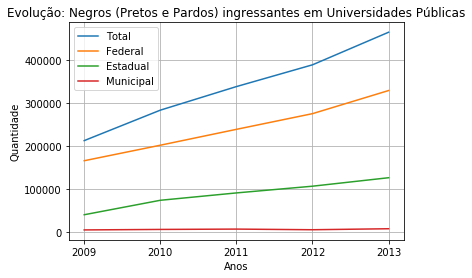

In [5]:
#plotar dados gráfico
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10,8)
ax.plot(anos, dados, label='Total')
ax.plot(anos, dadosFe, label='Federal')
ax.plot(anos, dadosEs, label='Estadual')
ax.plot(anos, dadosMu, label='Municipal')
ax.grid()
plt.legend()
plt.title('Evolução: Negros (Pretos e Pardos) ingressantes em Universidades Públicas')
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.show()

In [24]:
#organização dos dados em tabelas, para melhor visualização dos dados
consolidacao = {
'2009': [dadosFe[0], dadosEs[0], dadosMu[0], dados[0]],
'2010': [dadosFe[1], dadosEs[1], dadosMu[1], dados[1]],
'2011': [dadosFe[2], dadosEs[2], dadosMu[2], dados[2]],
'2012': [dadosFe[3], dadosEs[3], dadosMu[3], dados[3]],
'2013': [dadosFe[4], dadosEs[4], dadosMu[4], dados[4]],
}
df_DC = pd.DataFrame(consolidacao, columns=anos, index=['Federal','Estadual','Municipal','Total'])
df_DC

,2009,2010,2011,2012,2013
Federal,166132,202088,238883,275255,328839
Estadual,40901,74408,91476,107063,126693
Municipal,5704,6820,7608,6115,8427
Total,212737,283316,337967,388433,463959
